<a href="https://colab.research.google.com/github/gokulred/ML-Learn/blob/main/Heart_Disease_EDA_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Description**


Heart disease is one of the leading causes of death worldwide.
This project aims to explore clinical factors that leads to heart disease and identify patterns that may help in early prevention.This is a Binary Classification problem


*  1 → Heart Disease present
* 0 → No Heart Disease



# **Dataset** **Description**

The dataset  provide information on clinical factors that lead to heart diseases.This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.




# **Columns Description**


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]


1.  ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

1.  RestingBP: resting blood pressure [mm Hg]

1.   Cholesterol: serum cholesterol [mm/dl]

1. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
2. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


2.  MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]


2.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]


2. Oldpeak: oldpeak = ST [Numeric value measured in depression]

1.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
2.  HeartDisease: output class [1: heart disease, 0: No Disease]









# **Enironment Set-up**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Wrangling**

In [2]:
heart_df=pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.duplicated().sum()

np.int64(0)


# **Exploration** **Summary**


*   Heart dataframe consists of 918 records and 12 attributes
*   Dataframe has no NaNs nor duplicated values.



*  columns data types are consistant.








# **Univariate Analysis**


In [10]:
numerical_cols = heart_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols =heart_df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

heart_df[numerical_cols].describe()




,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Although the dataset does not contain missing or duplicate values, certain  features such as RestingBP and Cholesterol contain  zero values, suggesting the presence of  missing or error in data.And since mean of HeartDisease is o.55 we can conclude that the people with disease is a little high and the dataset is fairly balanced





*   **Age Distribution**







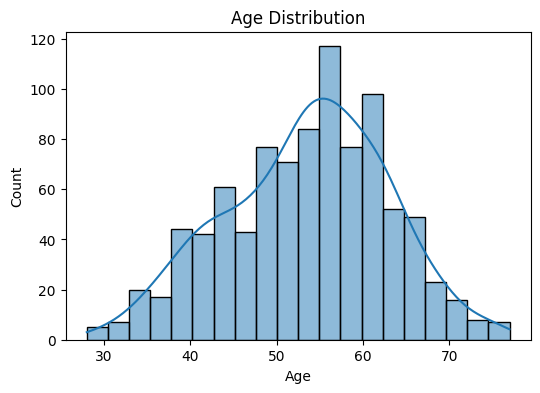

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(heart_df['Age'],bins=20,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age distribution shows patients of age between 40 and 65 are more in number.This indicates age as a potential risk factor



*    **RestingBP**




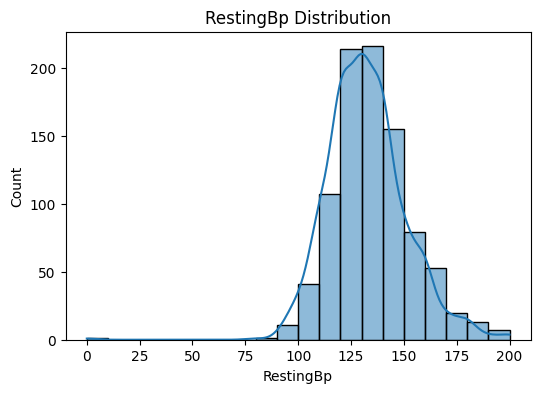

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(heart_df['RestingBP'],bins=20,kde=True)
plt.title('RestingBp Distribution')
plt.xlabel('RestingBp')
plt.ylabel('Count')
plt.show()

The RestingBP plot shows that most patients have blood pressure values between 120 and 140 mm Hg, which is high blood pressure .  The presence of zero values indicates medically unrealistic measurements, suggesting potential data quality issues .



*   **Cholesterol distribution plot**




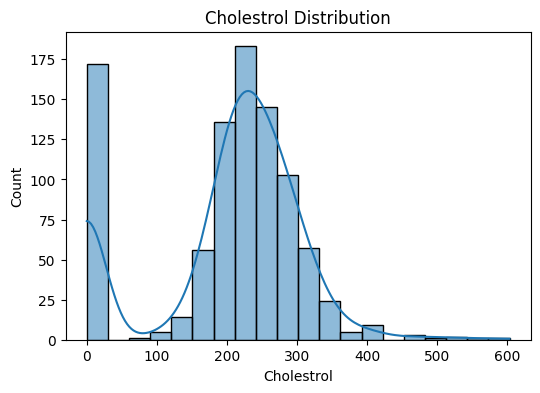

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(heart_df['Cholesterol'],bins=20,kde=True)
plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.show()

The cholesterol distribution shows most patients having values between 180 and 280 mg/dl. The presence of extreme high values and a noticeable number of zero values suggests data quality issues such as outliers and missing measurements. These factors indicate that cholesterol is a critical feature that will require preprocessing before use in predictive modeling.

In [15]:
pd.crosstab(heart_df['Sex'],heart_df['HeartDisease'])

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


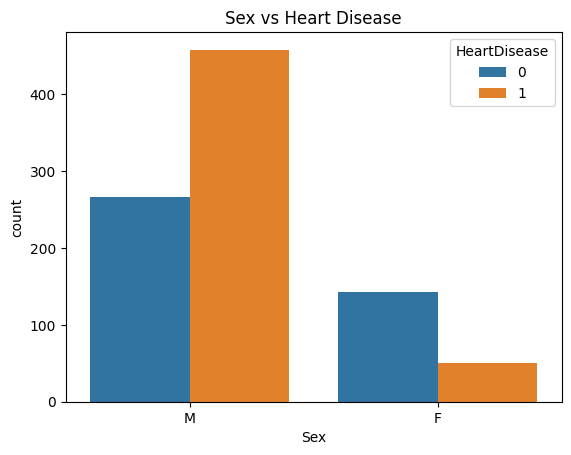

In [16]:
sns.countplot(x='Sex',hue='HeartDisease',data=heart_df)
plt.title('Sex vs Heart Disease')
plt.show()

Male patients have a higher proportion of heart disease cases compared to female patients. This suggests that sex is an important factor influencing heart disease risk.

In [18]:
pd.crosstab(heart_df['ChestPainType'],heart_df['HeartDisease'])

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


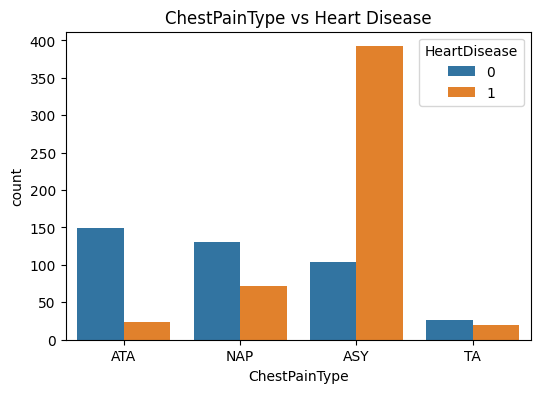

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='ChestPainType',hue='HeartDisease',data=heart_df)
plt.title('ChestPainType vs Heart Disease')
plt.show()

Asymptomatic chest pain (ASY) shows a  higher proportion of heart disease cases compared to other chest pain types. In contrast, patients with atypical angina (ATA) predominantly do not exhibit heart disease. This highlights chest pain type as a critical clinical indicator for heart disease risk.

In [20]:
pd.crosstab(heart_df['ExerciseAngina'], heart_df['HeartDisease'])


HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


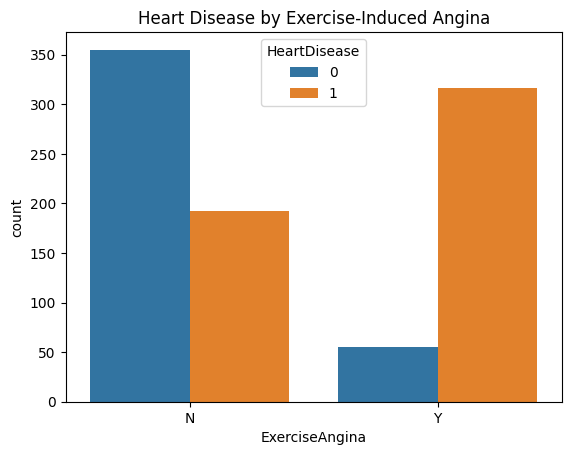

In [21]:
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=heart_df)
plt.title('Heart Disease by Exercise-Induced Angina')
plt.show()


Patients with exercise-induced angina have a significantly higher likelihood of heart disease compared to those without exercise-induced angina, making this feature a strong indicator of cardiovascular risk.

In [22]:
pd.crosstab(heart_df['ST_Slope'], heart_df['HeartDisease'])


HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


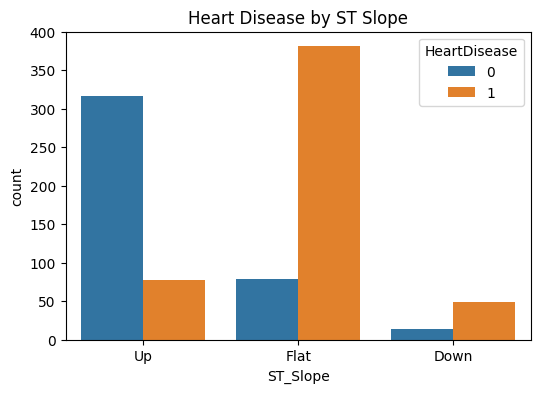

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=heart_df)
plt.title('Heart Disease by ST Slope')
plt.show()


Patients with flat ST_slope have high risk of heart disease.And people with upsloping have less  chance of heart disease

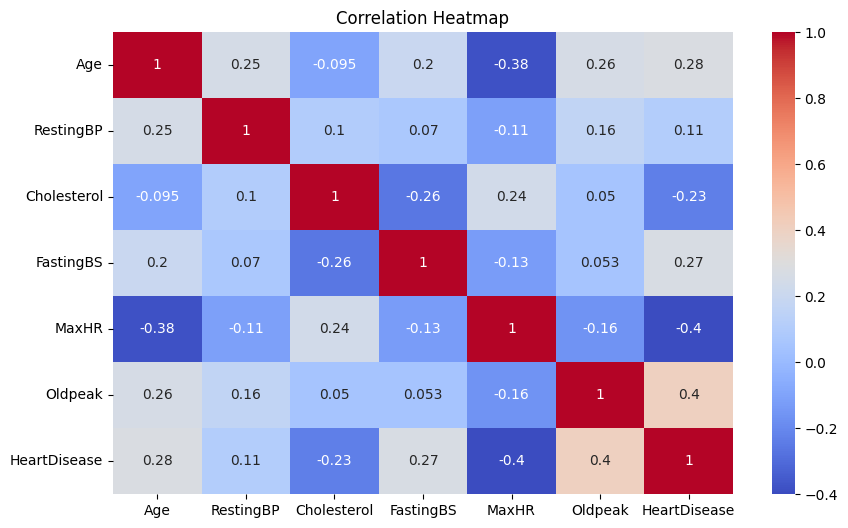

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


MaxHR and Oldpeak exhibit the strongest correlations with heart disease, according to correlation analysis. Oldpeak exhibits a positive correlation, indicating that higher ST depression is associated with increased risk, whereas MaxHR is negatively correlated, suggesting that patients with lower maximum heart rates are more likely to have heart disease. Additionally, there is a moderately positive correlation between age and fasting blood sugar. Weaker linear relationships are seen for cholesterol and resting blood pressure, which may be impacted by non-linear effects and problems with data quality.

# **Conclusion**
Important clinical and demographic characteristics linked to heart disease were found by this exploratory data analysis. Strong correlations with heart disease were shown by characteristics like the type of chest pain, exercise-induced angina, ST segment slope, maximum heart rate, and ST depression. The analysis also showed problems with the quality of the data in measurements of cholesterol and resting blood pressure, emphasizing the significance of preprocessing prior to model development. All things considered, this EDA offers a solid basis for developing predictive machine learning models targeted at the early detection of heart disease.|